Exploring Hacker News Posts

https://github.com/dataquestio/solutions/blob/master/Mission356Solutions.ipynb

^^ **Learn how to document ipynb Later**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hacker-news/hacker-news-posts")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [2]:
# Example lines in data
import csv
with open(path + "/HN_posts_year_to_Sep_26_2016.csv") as f:
    csv_reader = csv.reader(f)
    rows = list(csv_reader)
    for row in rows[:5]:
        print(row)
   

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']
['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']
['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']
['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']


In [3]:
# Create variables
import csv
with open(path + "/HN_posts_year_to_Sep_26_2016.csv") as f:

    csv_reader = csv.reader(f)
    total_lines = list(csv_reader)

    ahn = [] # ask Hn posts
    ahn_comments = 0 # ask HN comment number

    shn = [] # show HN posts
    shn_comments = 0 # show HN comment number

    other = []
    other_comments = 0


    for row in total_lines[1:]:
        if "Ask HN" in row[1]:
            ahn.append(row) 
            if row[4]:
                ahn_comments += int(row[4])
        elif "Show HN" in row[1]:
            shn.append(row) 
            if row[4]:
                shn_comments += int(row[4])
        else:
            other.append(row) 
            if row[4]:
                other_comments += int(row[4])


print(len(ahn))
print(len(shn))
print(len(other))

9129
10163
273827


In [4]:
# Show part of ahn and shn lists
for i in ahn[:5]:
    print(i)
print("------")
for i in shn[:5]:
    print(i)
print("------")

['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53']
['12578522', 'Ask HN: How do you pass on your work when you die?', '', '6', '3', 'PascLeRasc', '9/26/2016 1:17']
['12577908', 'Ask HN: How a DNS problem can be limited to a geographic region?', '', '1', '0', 'kuon', '9/25/2016 22:57']
['12577870', 'Ask HN: Why join a fund when you can be an angel?', '', '1', '3', 'anthony_james', '9/25/2016 22:48']
['12577647', 'Ask HN: Someone uses stock trading as passive income?', '', '5', '2', '00taffe', '9/25/2016 21:50']
------
['12578335', 'Show HN: Finding puns computationally', 'http://puns.samueltaylor.org/', '2', '0', 'saamm', '9/26/2016 0:36']
['12578182', 'Show HN: A simple library for complicated animations', 'https://christinecha.github.io/choreographer-js/', '1', '0', 'christinecha', '9/26/2016 0:01']
['12578098', 'Show HN: WebGL visualization of DNA sequences', 'http://grondilu.github.io/dna.html', '1', '0', 'grondilu', '9/25/2

In [5]:
print(f"Average number of comments on 'Ask HN' posts: {ahn_comments / len(ahn)}") 
print(f"Average number of comments on 'Show HN' posts: {shn_comments / len(shn)}") 

Average number of comments on 'Ask HN' posts: 10.400043816409246
Average number of comments on 'Show HN' posts: 4.8879267932697035


In [ ]:
comment_times = {}
number_times = {}

for line in total_lines[1:]:
    hour = line[6].split(" ")[1].split(":")[0]
    num_comments = line[4]
    if int(hour) in comment_times:
        comment_times[int(hour)] += int(num_comments)
        number_times[int(hour)] += 1
    else:
        comment_times[int(hour)] = int(num_comments)
        number_times[int(hour)] = 1


{0: 59051, 1: 50851, 2: 54172, 3: 45851, 4: 47091, 5: 44203, 6: 45541, 7: 47586, 8: 53937, 9: 59029, 10: 63388, 11: 76282, 12: 97925, 13: 116861, 14: 117088, 15: 137635, 16: 124557, 17: 127000, 18: 120621, 19: 107872, 20: 94965, 21: 86255, 22: 72881, 23: 62119}
{0: 8968, 1: 7920, 2: 7455, 3: 7126, 4: 7103, 5: 6536, 6: 7380, 7: 7800, 8: 8503, 9: 9052, 10: 9735, 11: 10352, 12: 12734, 13: 15928, 14: 18138, 15: 19525, 16: 20170, 17: 19711, 18: 18676, 19: 17037, 20: 15955, 21: 14516, 22: 12417, 23: 10382}
{0: 6.58, 1: 6.42, 2: 7.27, 3: 6.43, 4: 6.63, 5: 6.76, 6: 6.17, 7: 6.1, 8: 6.34, 9: 6.52, 10: 6.51, 11: 7.37, 12: 7.69, 13: 7.34, 14: 6.46, 15: 7.05, 16: 6.18, 17: 6.44, 18: 6.46, 19: 6.33, 20: 5.95, 21: 5.94, 22: 5.87, 23: 5.98}


In [ ]:
avg_comment_per_hour = {}
for key, value in comment_times.items():
    avg_comment_per_hour[key] = float(f"{value / number_times[key]:.2f}")

avg_comment_per_hour = dict(sorted(avg_comment_per_hour.items()))

print(avg_comment_per_hour)

{0: 6.58, 1: 6.42, 2: 7.27, 3: 6.43, 4: 6.63, 5: 6.76, 6: 6.17, 7: 6.1, 8: 6.34, 9: 6.52, 10: 6.51, 11: 7.37, 12: 7.69, 13: 7.34, 14: 6.46, 15: 7.05, 16: 6.18, 17: 6.44, 18: 6.46, 19: 6.33, 20: 5.95, 21: 5.94, 22: 5.87, 23: 5.98}


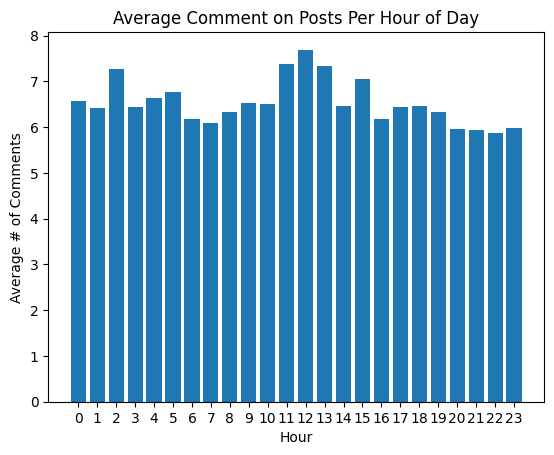

In [7]:
import matplotlib.pyplot as plt
x = avg_comment_per_hour.keys()
y = avg_comment_per_hour.values()

plt.bar(x,y)
plt.title("Average Comment on Posts Per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average # of Comments")
plt.xticks(range(len(x)), x)
plt.show()

In [23]:
import numpy as np
keys = list(avg_comment_per_hour.keys())
values = list(avg_comment_per_hour.values())

sorted_value_index = np.argsort(values)[::-1]

avg_comment_per_hour_ranked = {keys[i]: values[i] for i in sorted_value_index}

print(avg_comment_per_hour_ranked)

{12: 7.69, 11: 7.37, 13: 7.34, 2: 7.27, 15: 7.05, 5: 6.76, 4: 6.63, 0: 6.58, 9: 6.52, 10: 6.51, 14: 6.46, 18: 6.46, 17: 6.44, 3: 6.43, 1: 6.42, 8: 6.34, 19: 6.33, 16: 6.18, 6: 6.17, 7: 6.1, 23: 5.98, 20: 5.95, 21: 5.94, 22: 5.87}


In [25]:
print("Top 5 Hours to Post")
count = 0
for key, value in avg_comment_per_hour_ranked.items():
    if key >= 12:
        if key == 12:
            hour = f"{key}pm"
        else: 
            hour = f"{key - 12}pm"
    else:
        if key == 0:
            hour = f"{key+12}am"
        else:
            hour = f"{key}am"
    print(f"Hour: {hour}, Average # of Comments Per Post: {value}")
    count += 1
    if count > 4:
       break

Top 5 Hours to Post
Hour: 12pm, Average # of Comments Per Post: 7.69
Hour: 11am, Average # of Comments Per Post: 7.37
Hour: 1pm, Average # of Comments Per Post: 7.34
Hour: 2am, Average # of Comments Per Post: 7.27
Hour: 3pm, Average # of Comments Per Post: 7.05
